You will only have to modify the code for the filepaths of the train and test files. Everything else should run as is. 

The only other change you may want to make is the return statement of the MyModel.predict method. I have it so that it returns a python list of lists (since that is what the output in the rule document looked like). If a numpy array is easier to work with for your marking, you can delete the .tolist() from Y.tolist().

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
def preprocess(df, is_train=True):
    X = df[["avg_dry_bulb_temperature", "avg_dew_point",
            "avg_relative_humidity", "avg_rain_mm", "avg_snow_cm", "avg_hail_mm",
            "avg_precipitation_mm", "avg_wind_speed_kmh", "avg_wind_gust_kmh",
            "avg_wind_azimuth", "avg_ffmc", "avg_dmc", "avg_dc", "avg_isi",
            "avg_bui", "avg_fwi", "avg_edr"]]
    if is_train:
        y1 = df["is_fire"]
        y2 = df["is_fire_tmrw"]
        y3 = df["is_fire_2days"]
        return X, y1, y2, y3
    else:
        return X

class MyModel():
    def __init__(self):
        self.params = {'alpha': 2.2222222222222223,
                        'eta': 0.8111111111111111,
                        'gamma': 5.0,
                        'lambda': 5.555555555555555,
                        'max_delta_step': 1.1111111111111112,
                        'max_depth': 6,
                        'min_child_weight': 0.3333333333333333,
                        'scale_pos_weight': 1.0}
        self.model1 = XGBClassifier(param=self.params)
        self.model2 = XGBClassifier(param=self.params)
        self.model3 = XGBClassifier(param=self.params)

    def fit(self, X, y1, y2, y3):
        self.model1.fit(X, y1)
        self.model2.fit(X, y2)
        self.model3.fit(X, y3)

    def predict(self, X):
        y1 = self.model1.predict_proba(X)[:, 1].reshape((1, -1))
        y2 = self.model2.predict_proba(X)[:, 1].reshape((1, -1))
        y3 = self.model3.predict_proba(X)[:, 1].reshape((1, -1))

        Y = np.concatenate((y1, y2, y3), axis=0)

        return Y.tolist()
        

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
myPredictions = None
# need to change these file name
nameOfTrainFile = '/content/drive/MyDrive/wildfire_train.csv'
nameOfTestFile = '/content/drive/MyDrive/wildfire_test.csv'


In [ ]:
raw_dataframe = pd.read_csv(nameOfTrainFile)
X, y1, y2, y3 = preprocess(raw_dataframe)
model = MyModel()
model.fit(X, y1, y2, y3)

In [ ]:
test_dataframe = pd.read_csv(nameOfTestFile)
X = preprocess(test_dataframe, is_train=False)
myPredictions = model.predict(X)

In [ ]:
# evaluate ROC AUC
from sklearn.metrics import roc_auc_score

y1_test=test_dataframe['is_fire']
y2_test=test_dataframe['is_fire_tmrw']
y3_test=test_dataframe['is_fire_2days']


y1_hat = myPredictions[0]
y2_hat = myPredictions[1]
#y3_hat = myPredictions[2]

today_roc_auc = roc_auc_score(y1_test, y1_hat)
tmrw_roc_auc = roc_auc_score(y2_test, y2_hat)
#twoday_roc_auc = roc_auc_score(y3_test, y3_hat)

print(today_roc_auc)
print(tmrw_roc_auc)
#print(twoday_roc_auc)
#print(0.7 * today_roc_auc + 0.2 * tmrw_roc_auc + 0.1 * twoday_roc_auc)

0.8244001325737011
0.6617449664429531


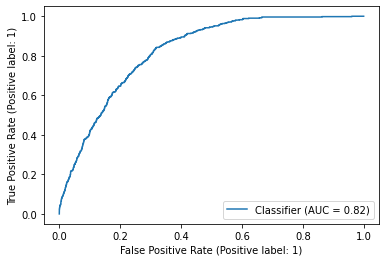

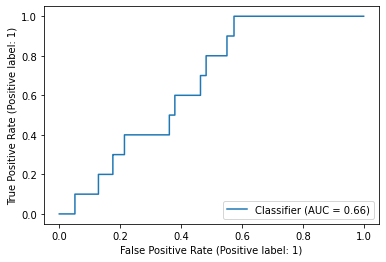

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y1_test,y1_hat)
RocCurveDisplay.from_predictions(y2_test,y2_hat)